In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [74]:
df = pd.read_csv("../classification/obesity_classification.csv")
df.head(10)

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese
5,6,50,Female,140,40,16.7,Underweight
6,7,55,Male,200,110,34.2,Obese
7,8,60,Female,130,30,13.3,Underweight
8,9,65,Male,210,120,37.2,Obese
9,10,70,Female,120,20,10.0,Underweight


In [75]:
df_cleaned = df.dropna()
df_cleaned = df_cleaned.drop_duplicates()

print(f"Original shape: {df.shape}")
print(f"Cleaned shape: {df_cleaned.shape}")

Original shape: (108, 7)
Cleaned shape: (108, 7)


In [76]:
print(df_cleaned.dtypes)  
for col in df_cleaned.select_dtypes(include='object').columns:
    print(f"{col} unique values: {df_cleaned[col].unique()}")

ID          int64
Age         int64
Gender     object
Height      int64
Weight      int64
BMI       float64
Label      object
dtype: object
Gender unique values: ['Male' 'Female']
Label unique values: ['Normal Weight' 'Overweight' 'Underweight' 'Obese']


In [77]:
print(df_cleaned.describe())

               ID         Age      Height      Weight         BMI
count  108.000000  108.000000  108.000000  108.000000  108.000000
mean    56.046296   46.555556  166.574074   59.490741   20.549074
std     31.917939   24.720620   27.873615   28.856233    7.583818
min      1.000000   11.000000  120.000000   10.000000    3.900000
25%     28.750000   27.000000  140.000000   35.000000   16.700000
50%     56.500000   42.500000  175.000000   55.000000   21.200000
75%     83.250000   59.250000  190.000000   85.000000   26.100000
max    110.000000  112.000000  210.000000  120.000000   37.200000


/var/folders/xn/nlz9z9sn7k92r98bkxjc8h1w0000gn/T/ipykernel_3051/532401529.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='Label', order=df_cleaned['Label'].value_counts().index, palette='Set2')


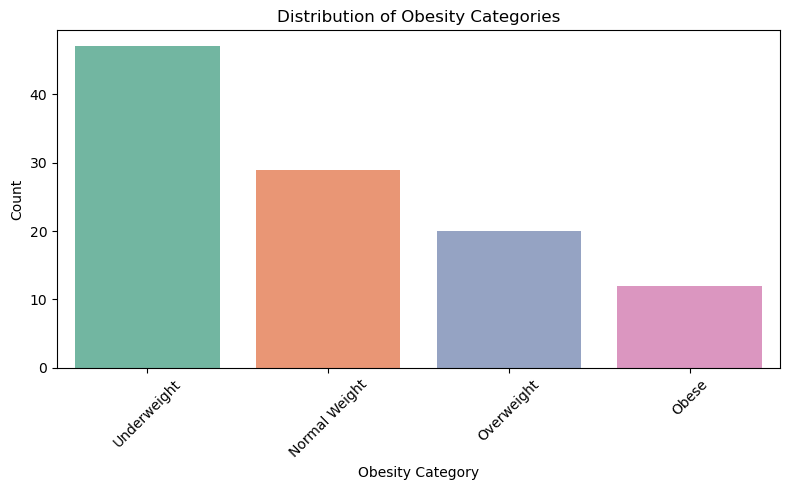

In [78]:
# Box plot - Distribution of Obesity
plt.figure(figsize=(8,5))
sns.countplot(data=df_cleaned, x='Label', order=df_cleaned['Label'].value_counts().index, palette='Set2')
plt.title("Distribution of Obesity Categories")
plt.xlabel("Obesity Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/xn/nlz9z9sn7k92r98bkxjc8h1w0000gn/T/ipykernel_3051/3497806352.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='Label', y='BMI', palette='Set3')


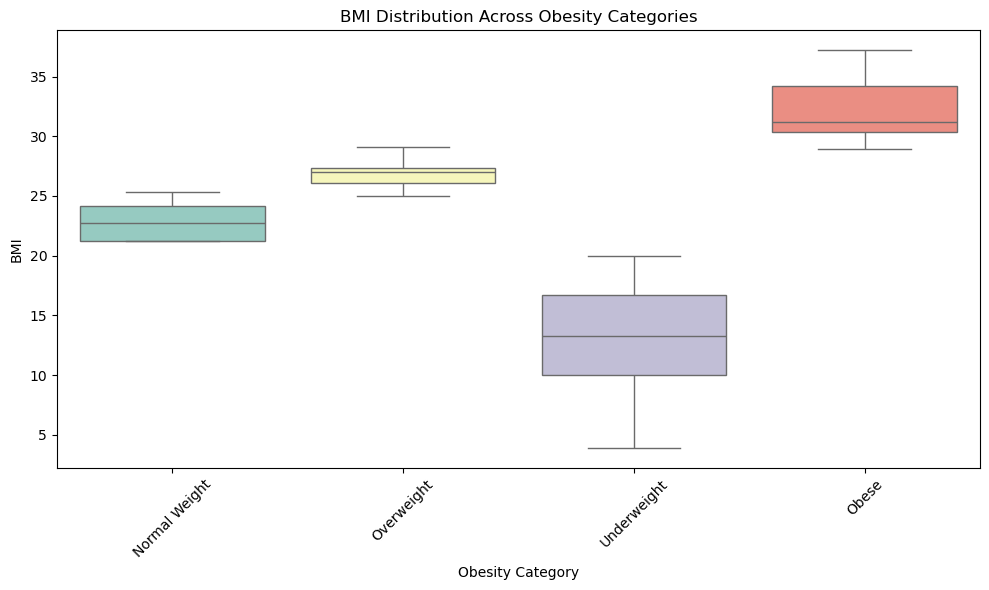

In [79]:
# BMI Distribution to Obesity 
plt.figure(figsize=(10,6))
sns.boxplot(data=df_cleaned, x='Label', y='BMI', palette='Set3')
plt.title("BMI Distribution Across Obesity Categories")
plt.xlabel("Obesity Category")
plt.ylabel("BMI")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

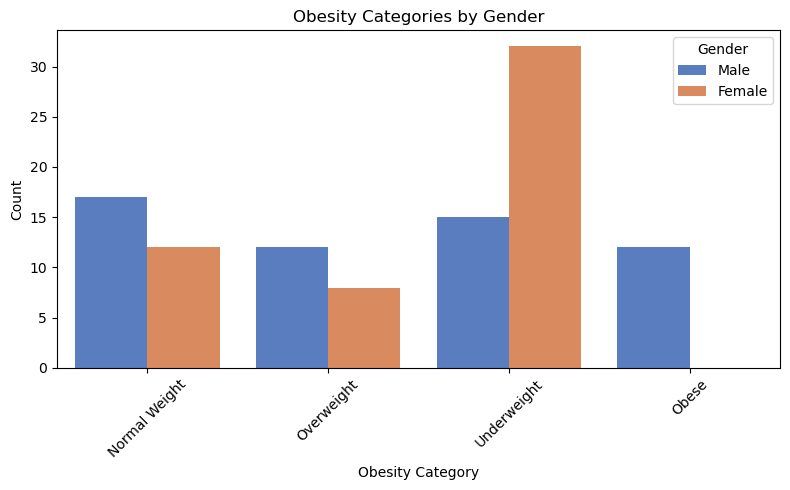

In [80]:
# Box plot - Obesity Categories by Gender
plt.figure(figsize=(8,5))
sns.countplot(data=df_cleaned, x='Label', hue='Gender', palette='muted')
plt.title("Obesity Categories by Gender")
plt.xlabel("Obesity Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Feature selection
X = df_cleaned[['Age', 'Gender', 'Height', 'Weight', 'BMI']]  # Select relevant features
y = df_cleaned['Label']  # Target variable (classification labels)

# Encode 'Gender' using One-Hot Encoding
X = pd.get_dummies(X, columns=['Gender'], drop_first=True)

# Split the dataset into training and testing sets (80%/20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Logistic Regression model (or any other classifier)
model = LogisticRegression(multi_class='ovr', solver='liblinear')
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7727272727272727
Confusion Matrix:
 [[4 0 1 1]
 [0 3 1 0]
 [1 1 2 0]
 [0 0 0 8]]
Classification Report:
                precision    recall  f1-score   support

Normal Weight       0.80      0.67      0.73         6
        Obese       0.75      0.75      0.75         4
   Overweight       0.50      0.50      0.50         4
  Underweight       0.89      1.00      0.94         8

     accuracy                           0.77        22
    macro avg       0.73      0.73      0.73        22
 weighted avg       0.77      0.77      0.77        22



The diagonal values are correct predictions.
Off-diagonal values are misclassifications.

So:
Class 0: 4 correct, 2 misclassified

Class 1: 3 correct, 1 misclassified

Class 2: 2 correct, 2 misclassified

Class 3: 8 correct, 0 misclassified

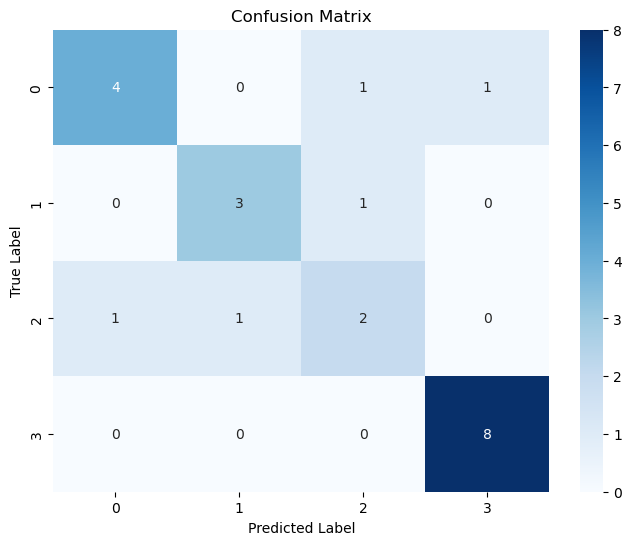

In [83]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Row 1:
True positives (TP): 4
These are the instances where the model correctly predicted class 1.
False positives (FP): 0
These are the instances where the model incorrectly predicted class 1, but the actual class was something else.
False negatives (FN): 1
These are the instances where the model missed class 1 (i.e., it predicted a different class when it should have predicted class 1).
True negatives (TN): 1
These are the instances where the model correctly predicted a different class than class 1 (i.e., it didn't predict class 1 when it shouldn't).

Row 2:
True positives (TP): 3
The model correctly predicted class 2 in 3 instances.
False positives (FP): 1
The model incorrectly predicted class 2 for one instance that was actually from a different class.
False negatives (FN): 0
There are no instances where the model missed class 2, so it's detecting class 2 correctly when it appears.
True negatives (TN): 3
The model correctly predicted other classes for the instances that were not class 2.

Row 3:
True positives (TP): 2
The model correctly predicted class 3 in 2 instances.
False positives (FP): 1
The model incorrectly predicted class 3 for one instance that was actually from a different class.
False negatives (FN): 1
The model missed class 3 in 1 instance, predicting a different class when it should have predicted class 3.
True negatives (TN): 2
The model correctly predicted other classes for the instances that were not class 3.

Row 4:
True positives (TP): 8
The model correctly predicted class 4 in 8 instances.
False positives (FP): 0
There are no instances where the model incorrectly predicted class 4 when the true class was different.
False negatives (FN): 0
There are no instances where the model missed class 4.
True negatives (TN): 0

In this case, there are no other classes that were incorrectly predicted as class 4, which means the model is very specific in predicting class 4.

Class 1: The model is very precise (100%) but misses some instances (80% recall).

Class 2: The model performs well, with good precision and recall.

Class 3: The model's recall is not perfect (it misses some instances), but precision is reasonable.

Class 4: The model performs exceptionally well for class 4, with no errors.